In [1]:
import sys
sys.path.append('../scripts')

from time_series_models import TimeSeriesForecasting

Load the Data

In [2]:
file_path = '../data/TSLA_processed.csv'
ts_forecasting = TimeSeriesForecasting(file_path)

Columns in dataset: Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Normalized Close'],
      dtype='object')


Split the Data into Training and Testing Sets

In [3]:
ts_forecasting.split_data()

Data split into train and test sets.


Train and Evaluate ARIMA Model

In [4]:
ts_forecasting.train_arima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11807.105, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11884.552, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11832.018, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11821.288, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11883.249, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11817.399, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11816.584, Time=0.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11817.506, Time=1.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11814.148, Time=1.87 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11817.551, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11818.682, Time=0.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11815.761, Time=0.73 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=11818.718, Time=2.01 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11805.719, Time=0.58 sec
 ARIMA(1,1,2)(0,0,0

Train and Evaluate SARIMA Model

In [5]:
ts_forecasting.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=11799.591, Time=3.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=11884.552, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=11827.898, Time=0.37 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=11819.065, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=11883.249, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=11805.177, Time=2.60 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=11804.257, Time=2.95 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=11784.117, Time=8.91 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=11784.404, Time=7.46 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=11787.368, Time=12.81 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=11785.027, Time=9.27 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=11796.931, Time=5.50 sec
 ARIMA(2,1,1)(2,0,1)[12] intercept   : AIC=11796.561, Time=3.36 sec
 ARIMA(3,1,2)(2,0,1)[12] intercept   : AIC=11798.356, Time=7.64 sec
 ARI

Train and Evaluate LSTM Model

In [4]:
ts_forecasting.build_lstm()

Epoch 1/20
62/62 [==============================] - 2s 8ms/step - loss: 570.3515
Epoch 2/20
62/62 [==============================] - 1s 10ms/step - loss: 90.7829
Epoch 3/20
62/62 [==============================] - 0s 6ms/step - loss: 75.4881
Epoch 4/20
62/62 [==============================] - 0s 5ms/step - loss: 66.7431
Epoch 5/20
62/62 [==============================] - 0s 6ms/step - loss: 65.4011
Epoch 6/20
62/62 [==============================] - 0s 6ms/step - loss: 80.2534
Epoch 7/20
62/62 [==============================] - 0s 7ms/step - loss: 56.3271
Epoch 8/20
62/62 [==============================] - 0s 6ms/step - loss: 61.3068
Epoch 9/20
62/62 [==============================] - 0s 5ms/step - loss: 46.4643
Epoch 10/20
62/62 [==============================] - 0s 5ms/step - loss: 78.8893
Epoch 11/20
62/62 [==============================] - 0s 7ms/step - loss: 57.0463
Epoch 12/20
62/62 [==============================] - 0s 5ms/step - loss: 46.4733
Epoch 13/20
62/62 [================

Plot the Actual vs Predicted Values

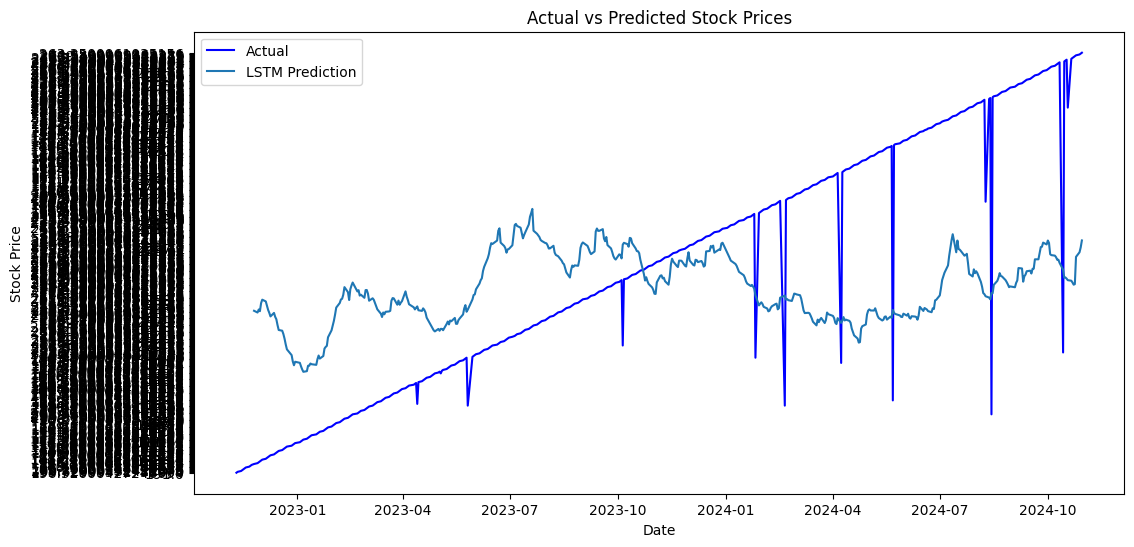

In [5]:
ts_forecasting.plot_results()

Summary of Results

In [ ]:
for model_name, predictions in ts_forecasting.predictions.items():
    mae, rmse, mape = ts_forecasting.evaluate(ts_forecasting.test['Close'], predictions)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")